# Feature Selection from Mobile data using Pearson Correlation and Chi2 filter method
Dataset: [https://raw.githubusercontent.com/subashgandyer/datasets/main/mobile_price_train.csv]

In [2]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown

In [3]:
url = "https://raw.githubusercontent.com/subashgandyer/datasets/main/mobile_price_train.csv"

In [4]:
mob_data = pd.read_csv(url)
mob_data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [5]:
mob_data.shape

(2000, 21)

In [6]:
mob_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
mob_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### Understand the data
- Find how many features?
- Find how many samples?
- What are the data types of each feature column?
- What do you think could be the most important feature(s)?
- Run some feature selection methods
- Is your intuition right?

### Split the dataset into X and y

In [8]:
X = mob_data.iloc[:,0:20]
y = mob_data.iloc[:,-1] 

In [9]:
X.shape, y.shape

((2000, 20), (2000,))

In [10]:
X = mob_data.drop("price_range", axis=1)
y = mob_data.price_range

In [11]:
X.shape, y.shape

((2000, 20), (2000,))

### How many features

In [12]:
X.shape

(2000, 20)

### Make a feature list

In [13]:
feature_names = X.columns.to_list()
feature_names

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

### Correlation:

In [14]:
corr_mat = mob_data.corr().round(3)
corr_mat

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000,0.011,0.011,-0.042,0.033,0.016,-0.004,0.034,0.002,-0.030,...,0.015,-0.008,-0.001,-0.030,-0.021,0.053,0.012,-0.011,-0.008,0.201
blue,0.011,1.000,0.021,0.035,0.004,0.013,0.041,0.004,-0.009,0.036,...,-0.007,-0.042,0.026,-0.003,0.001,0.014,-0.030,0.010,-0.022,0.021
clock_speed,0.011,0.021,1.000,-0.001,-0.000,-0.043,0.007,-0.014,0.012,-0.006,...,-0.015,-0.009,0.003,-0.029,-0.007,-0.011,-0.046,0.020,-0.024,-0.007
dual_sim,-0.042,0.035,-0.001,1.000,-0.029,0.003,-0.016,-0.022,-0.009,-0.025,...,-0.021,0.014,0.041,-0.012,-0.017,-0.039,-0.014,-0.017,0.023,0.017
fc,0.033,0.004,-0.000,-0.029,1.000,-0.017,-0.029,-0.002,0.024,-0.013,...,-0.010,-0.005,0.015,-0.011,-0.012,-0.007,0.002,-0.015,0.020,0.022
four_g,0.016,0.013,-0.043,0.003,-0.017,1.000,0.009,-0.002,-0.017,-0.030,...,-0.019,0.007,0.007,0.027,0.037,-0.047,0.584,0.017,-0.018,0.015
int_memory,-0.004,0.041,0.007,-0.016,-0.029,0.009,1.000,0.007,-0.034,-0.028,...,0.010,-0.008,0.033,0.038,0.012,-0.003,-0.009,-0.027,0.007,0.044
m_dep,0.034,0.004,-0.014,-0.022,-0.002,-0.002,0.007,1.000,0.022,-0.004,...,0.025,0.024,-0.009,-0.025,-0.018,0.017,-0.012,-0.003,-0.028,0.001
mobile_wt,0.002,-0.009,0.012,-0.009,0.024,-0.017,-0.034,0.022,1.000,-0.019,...,0.001,0.000,-0.003,-0.034,-0.021,0.006,0.002,-0.014,-0.000,-0.030
n_cores,-0.030,0.036,-0.006,-0.025,-0.013,-0.030,-0.028,-0.004,-0.019,1.000,...,-0.007,0.024,0.005,-0.000,0.026,0.013,-0.015,0.024,-0.010,0.004


In [15]:
import seaborn as sns
from matplotlib import pyplot as plt

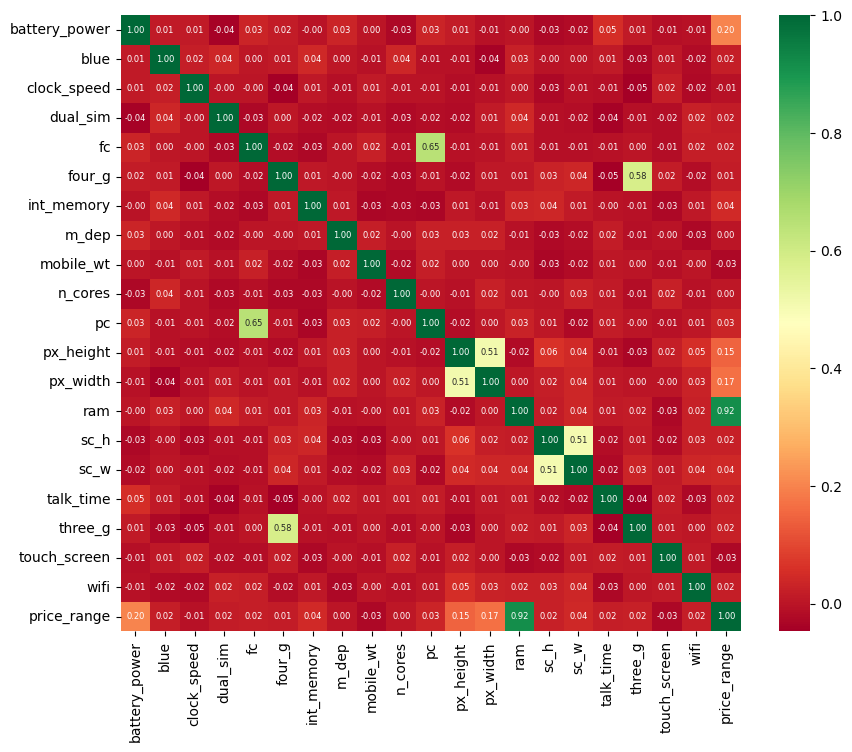

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap="RdYlGn", fmt=".2f", annot_kws={"size": 6})
plt.show()

### Use corrcoef from Numpy to calculate correlation between two features.

In [17]:
corr = np.corrcoef(X['battery_power'], y)[0,1]
corr

0.20072261211373096

In [18]:
corr = np.corrcoef(X['ram'], y)[0, 1]
corr

0.9170457362649908

(pandas review) using loc:

In [19]:
corr_x_y = corr_mat.loc['ram','price_range']
corr_x_y

0.917

### Calculate the correlation with y for each feature and collect all correlation values in a list

In [20]:
corr_list_scores = []
for i in feature_names:
    corr = np.corrcoef(X[i], y)[0,1]
    corr_list_scores.append(corr)

### Look at correlation values

In [21]:
corr_list_scores

[0.20072261211373096,
 0.02057285406141847,
 -0.006605690881732064,
 0.01744447923722472,
 0.02199820777690428,
 0.01477171141723938,
 0.044434959388987415,
 0.0008530365050864261,
 -0.030302171314386384,
 0.004399274799457278,
 0.03359930021353948,
 0.14885755500042172,
 0.16581750172625506,
 0.9170457362649908,
 0.022986073167424424,
 0.03871127166448417,
 0.02185887116237478,
 0.02361121688004502,
 -0.030411071898218043,
 0.018784812012789]

### Replace NaN with 0.
Nan values can appear when:
- Variable is constant (no variance).
- NaN values in the original data
- Huge or very small values (rare).

$$
\rho(X,Y) = \frac{\mathrm{cov}(X,Y)}{\sigma_X \sigma_Y}
$$

$$
\mathrm{cov}(X,Y) = \mathbb{E}[(X-\mu_X)(Y-\mu_Y)]
$$

In [22]:
corr_list_scores = [0 if np.isnan(i) else i for i in corr_list_scores]
corr_list_scores

[0.20072261211373096,
 0.02057285406141847,
 -0.006605690881732064,
 0.01744447923722472,
 0.02199820777690428,
 0.01477171141723938,
 0.044434959388987415,
 0.0008530365050864261,
 -0.030302171314386384,
 0.004399274799457278,
 0.03359930021353948,
 0.14885755500042172,
 0.16581750172625506,
 0.9170457362649908,
 0.022986073167424424,
 0.03871127166448417,
 0.02185887116237478,
 0.02361121688004502,
 -0.030411071898218043,
 0.018784812012789]

### Choose top feature

np.argsort() does not organize the array, it <span style='color:yellow'> retrieves the indexes that would organize the array </span>. Ascending order by default, from smaller to bigger

In [23]:
corr_feature = X.iloc[ : , np.argsort(np.abs(corr_list_scores))[-10:]].columns.to_list()
corr_feature

['three_g',
 'mobile_wt',
 'touch_screen',
 'pc',
 'sc_w',
 'int_memory',
 'px_height',
 'px_width',
 'battery_power',
 'ram']

### Was the feature selected or not

In [24]:
corr_support = [True if i in corr_feature else False for i in feature_names]
corr_support

[True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False]

### Can you turn the above notebook cells logic into a function like below ?

In [25]:
def corr_selector(X, y,num_feats):
    corr_list = []
    feature_names = X.columns.tolist()
    
    for i in X.columns.tolist():
        corr = np.corrcoef(X[i], y)[0, 1] # Hint: corrcoef accepts a complete matrix as argument: np.corrcoef(X,y)
        corr_list.append(corr)
    
    corr_list = [0 if np.isnan(i) else i for i in corr_list]
    
    corr_feature = X.iloc[:,np.argsort(np.abs(corr_list))[-num_feats:]].columns.tolist()
    
    corr_support = [True if i in corr_feature else False for i in feature_names]
    
    return corr_support, corr_feature

### Call the above function using the following line

In [26]:
corr_support, corr_feature = corr_selector(X, y,num_feats=10)
corr_support, corr_feature

([True,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  True,
  False,
  True,
  True,
  True,
  True,
  False,
  True,
  False,
  True,
  True,
  False],
 ['three_g',
  'mobile_wt',
  'touch_screen',
  'pc',
  'sc_w',
  'int_memory',
  'px_height',
  'px_width',
  'battery_power',
  'ram'])

In [27]:
display(Markdown("#### What is the support for? "))

display(X.columns[corr_support].tolist())

display(Markdown("#### The features are in the same order as they were in the original data."))

#### What is the support for? 

['battery_power',
 'int_memory',
 'mobile_wt',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_w',
 'three_g',
 'touch_screen']

#### The features are in the same order as they were in the original data.

### Create a dataframes with the Scores (corr_list_scores) and Features

In [28]:
feat_scores_pear = pd.DataFrame( {'Feature': X.columns, 'Scores': corr_list_scores } )
feat_scores_pear

,Feature,Scores
0,battery_power,0.200723
1,blue,0.020573
2,clock_speed,-0.006606
3,dual_sim,0.017444
4,fc,0.021998
5,four_g,0.014772
6,int_memory,0.044435
7,m_dep,0.000853
8,mobile_wt,-0.030302
9,n_cores,0.004399


## Top Features

In [29]:
top10_pear = feat_scores_pear.sort_values(by='Scores', ascending = False).head(10).reset_index()
top10_pear

,index,Feature,Scores
0,13,ram,0.917046
1,0,battery_power,0.200723
2,12,px_width,0.165818
3,11,px_height,0.148858
4,6,int_memory,0.044435
5,15,sc_w,0.038711
6,10,pc,0.033599
7,17,three_g,0.023611
8,14,sc_h,0.022986
9,4,fc,0.021998


# Chi square

### Import the necessary libraries

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

For χ², we look at <span style='color:yellow'>how the values of a feature are distributed conditioned on the class </span>, and compare that to what we would expect if the feature and the class were independent.

$$
\chi^2_j = \sum_{i} \frac{(O_i - E_i)^2}{E_i}
$$
- j iterates over features.
- i iterates over classes.

### Apply SelectKBest class to extract top 10 best features

In [31]:
chi2_list_scores = SelectKBest(score_func=chi2, k=10)
chi2_list_scores

SelectKBest(score_func=<function chi2 at 0x000001D00C6DB700>)

In [32]:
[m for m in dir(chi2_list_scores) if not m.startswith('__')]

['_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_params',
 '_get_param_names',
 '_get_support_mask',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_transform',
 '_validate_data',
 'fit',
 'fit_transform',
 'get_feature_names_out',
 'get_params',
 'get_support',
 'inverse_transform',
 'k',
 'score_func',
 'set_params',
 'transform']

### Train the model

In [33]:
topfeatures = chi2_list_scores.fit(X,y)

---
#### Let's make a pause and take a look to the transformed data...

In [34]:
transformed_X = topfeatures.transform(X)
print(transformed_X.shape, "\n")
print("Data containing only the features selected:", "\n")
print(transformed_X[0])

display(Markdown("#### This the data <span style='color:yellow'> transformed and ready to be inputed </span> in a pipeline or model. The features are **in the same order** as they were in the original data."))

(2000, 10) 

Data containing only the features selected: 

[8.420e+02 1.000e+00 7.000e+00 1.880e+02 2.000e+01 7.560e+02 2.549e+03
 9.000e+00 7.000e+00 1.900e+01]


#### This the data <span style='color:yellow'> transformed and ready to be inputed </span> in a pipeline or model. The features are **in the same order** as they were in the original data.

In [46]:
topfeatures.get_support()

array([ True, False, False, False,  True, False,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False, False])

In [47]:
X.columns[topfeatures.get_support()].tolist()

['battery_power',
 'fc',
 'int_memory',
 'mobile_wt',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

---
## Lets continue with the analysis ...

In [35]:
topfeatures.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [36]:
feat_scores_chi2 = pd.DataFrame( {'Feature': X.columns, 'Scores': topfeatures.scores_.round(2)} )
feat_scores_chi2

,Feature,Scores
0,battery_power,14129.87
1,blue,0.72
2,clock_speed,0.65
3,dual_sim,0.63
4,fc,10.14
5,four_g,1.52
6,int_memory,89.84
7,m_dep,0.75
8,mobile_wt,95.97
9,n_cores,9.10


In [37]:
top10_chi2 = feat_scores_chi2.sort_values(by='Scores', ascending = False).head(10)
top10_chi2

,Feature,Scores
13,ram,931267.52
11,px_height,17363.57
0,battery_power,14129.87
12,px_width,9810.59
8,mobile_wt,95.97
6,int_memory,89.84
15,sc_w,16.48
16,talk_time,13.24
4,fc,10.14
14,sc_h,9.61


In [38]:
set(top10_pear.Feature) & set(top10_chi2.Feature)

{'battery_power',
 'fc',
 'int_memory',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w'}